In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_relevant = pd.read_csv("data_relevant_mars_30", sep=",")

In [18]:
data_relevant

exporter importer secgroup product         v2020 exporter_name  \
0        ALB      DEU      CAT      TT    158.091928       Albania   
1        ALB      ESP      CAT      TT    153.783585       Albania   
2        ALB      GRC      CAT      TT    136.735389       Albania   
3        ALB      ITA      CAT      TT    786.785264       Albania   
4        ARG      BRA      CAT      TT   8239.436776     Argentina   
..       ...      ...      ...     ...           ...           ...   
372      VEN      MYS      CAT      TT    419.944433     Venezuela   
373      VNM      CHN      CAT      TT  74888.702313      Viet Nam   
374      VNM      JPN      CAT      TT  20585.290628      Viet Nam   
375      VNM      KOR      CAT      TT  19698.097677      Viet Nam   
376      VNM      USA      CAT      TT  74124.562477      Viet Nam   

                              importer_name  relative_volume  
0                                   Germany         0.081851  
1                                     Spain         0.079620  
2                                    Greece         0.070794  
3                                     Italy         0.407353  
4                                    Brazil         0.155157  
..                                      ...              ...  
372                                Malaysia         0.095323  
373                                   China         0.247177  
374                                   Japan         0.067944  
375                       Republic of Korea         0.065015  
376  USA- Puerto Rico and US Virgin Islands         0.244655  

[377 rows x 8 columns]

## Construction Graph

In [10]:
list_country=list(data_relevant['importer_name'].unique())

In [11]:
Graph_2020=nx.Graph()
Graph_2020.add_nodes_from(list_country)
Graph_2020.add_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name']))

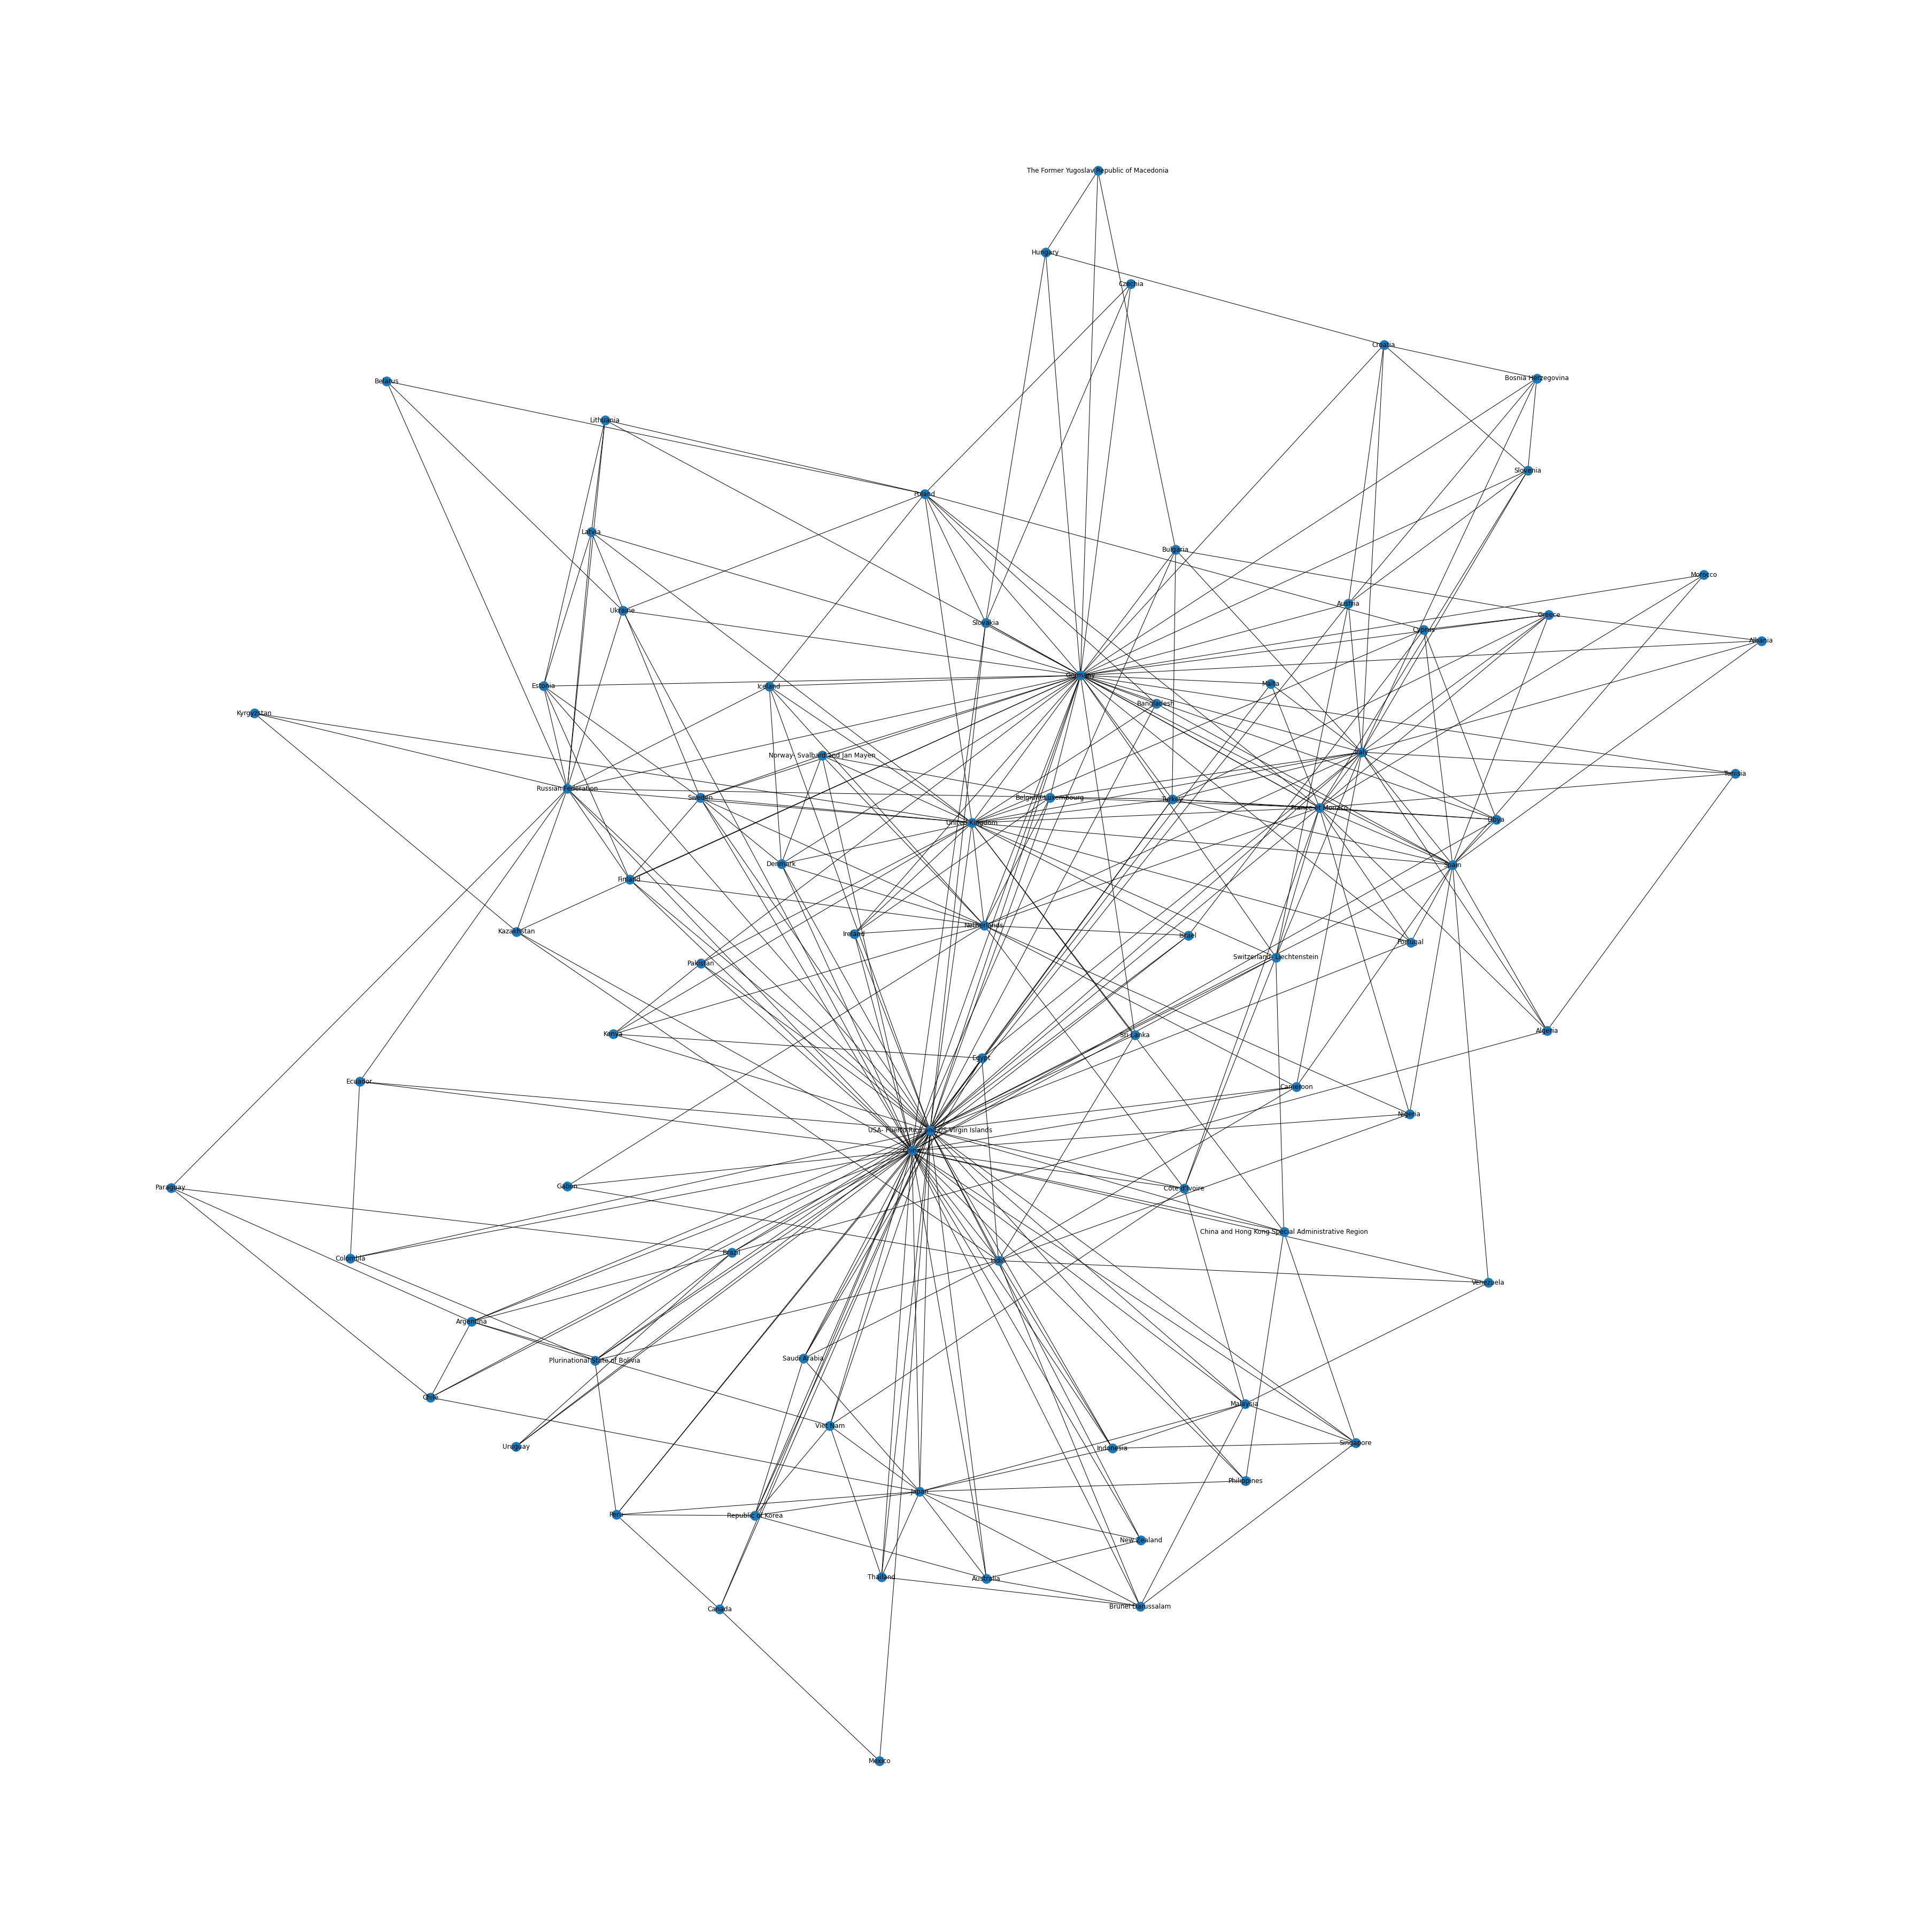

In [17]:
plt.figure(3, figsize=(50,50))
nx.draw(Graph_2020, with_labels=True, font_size=12)
plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()

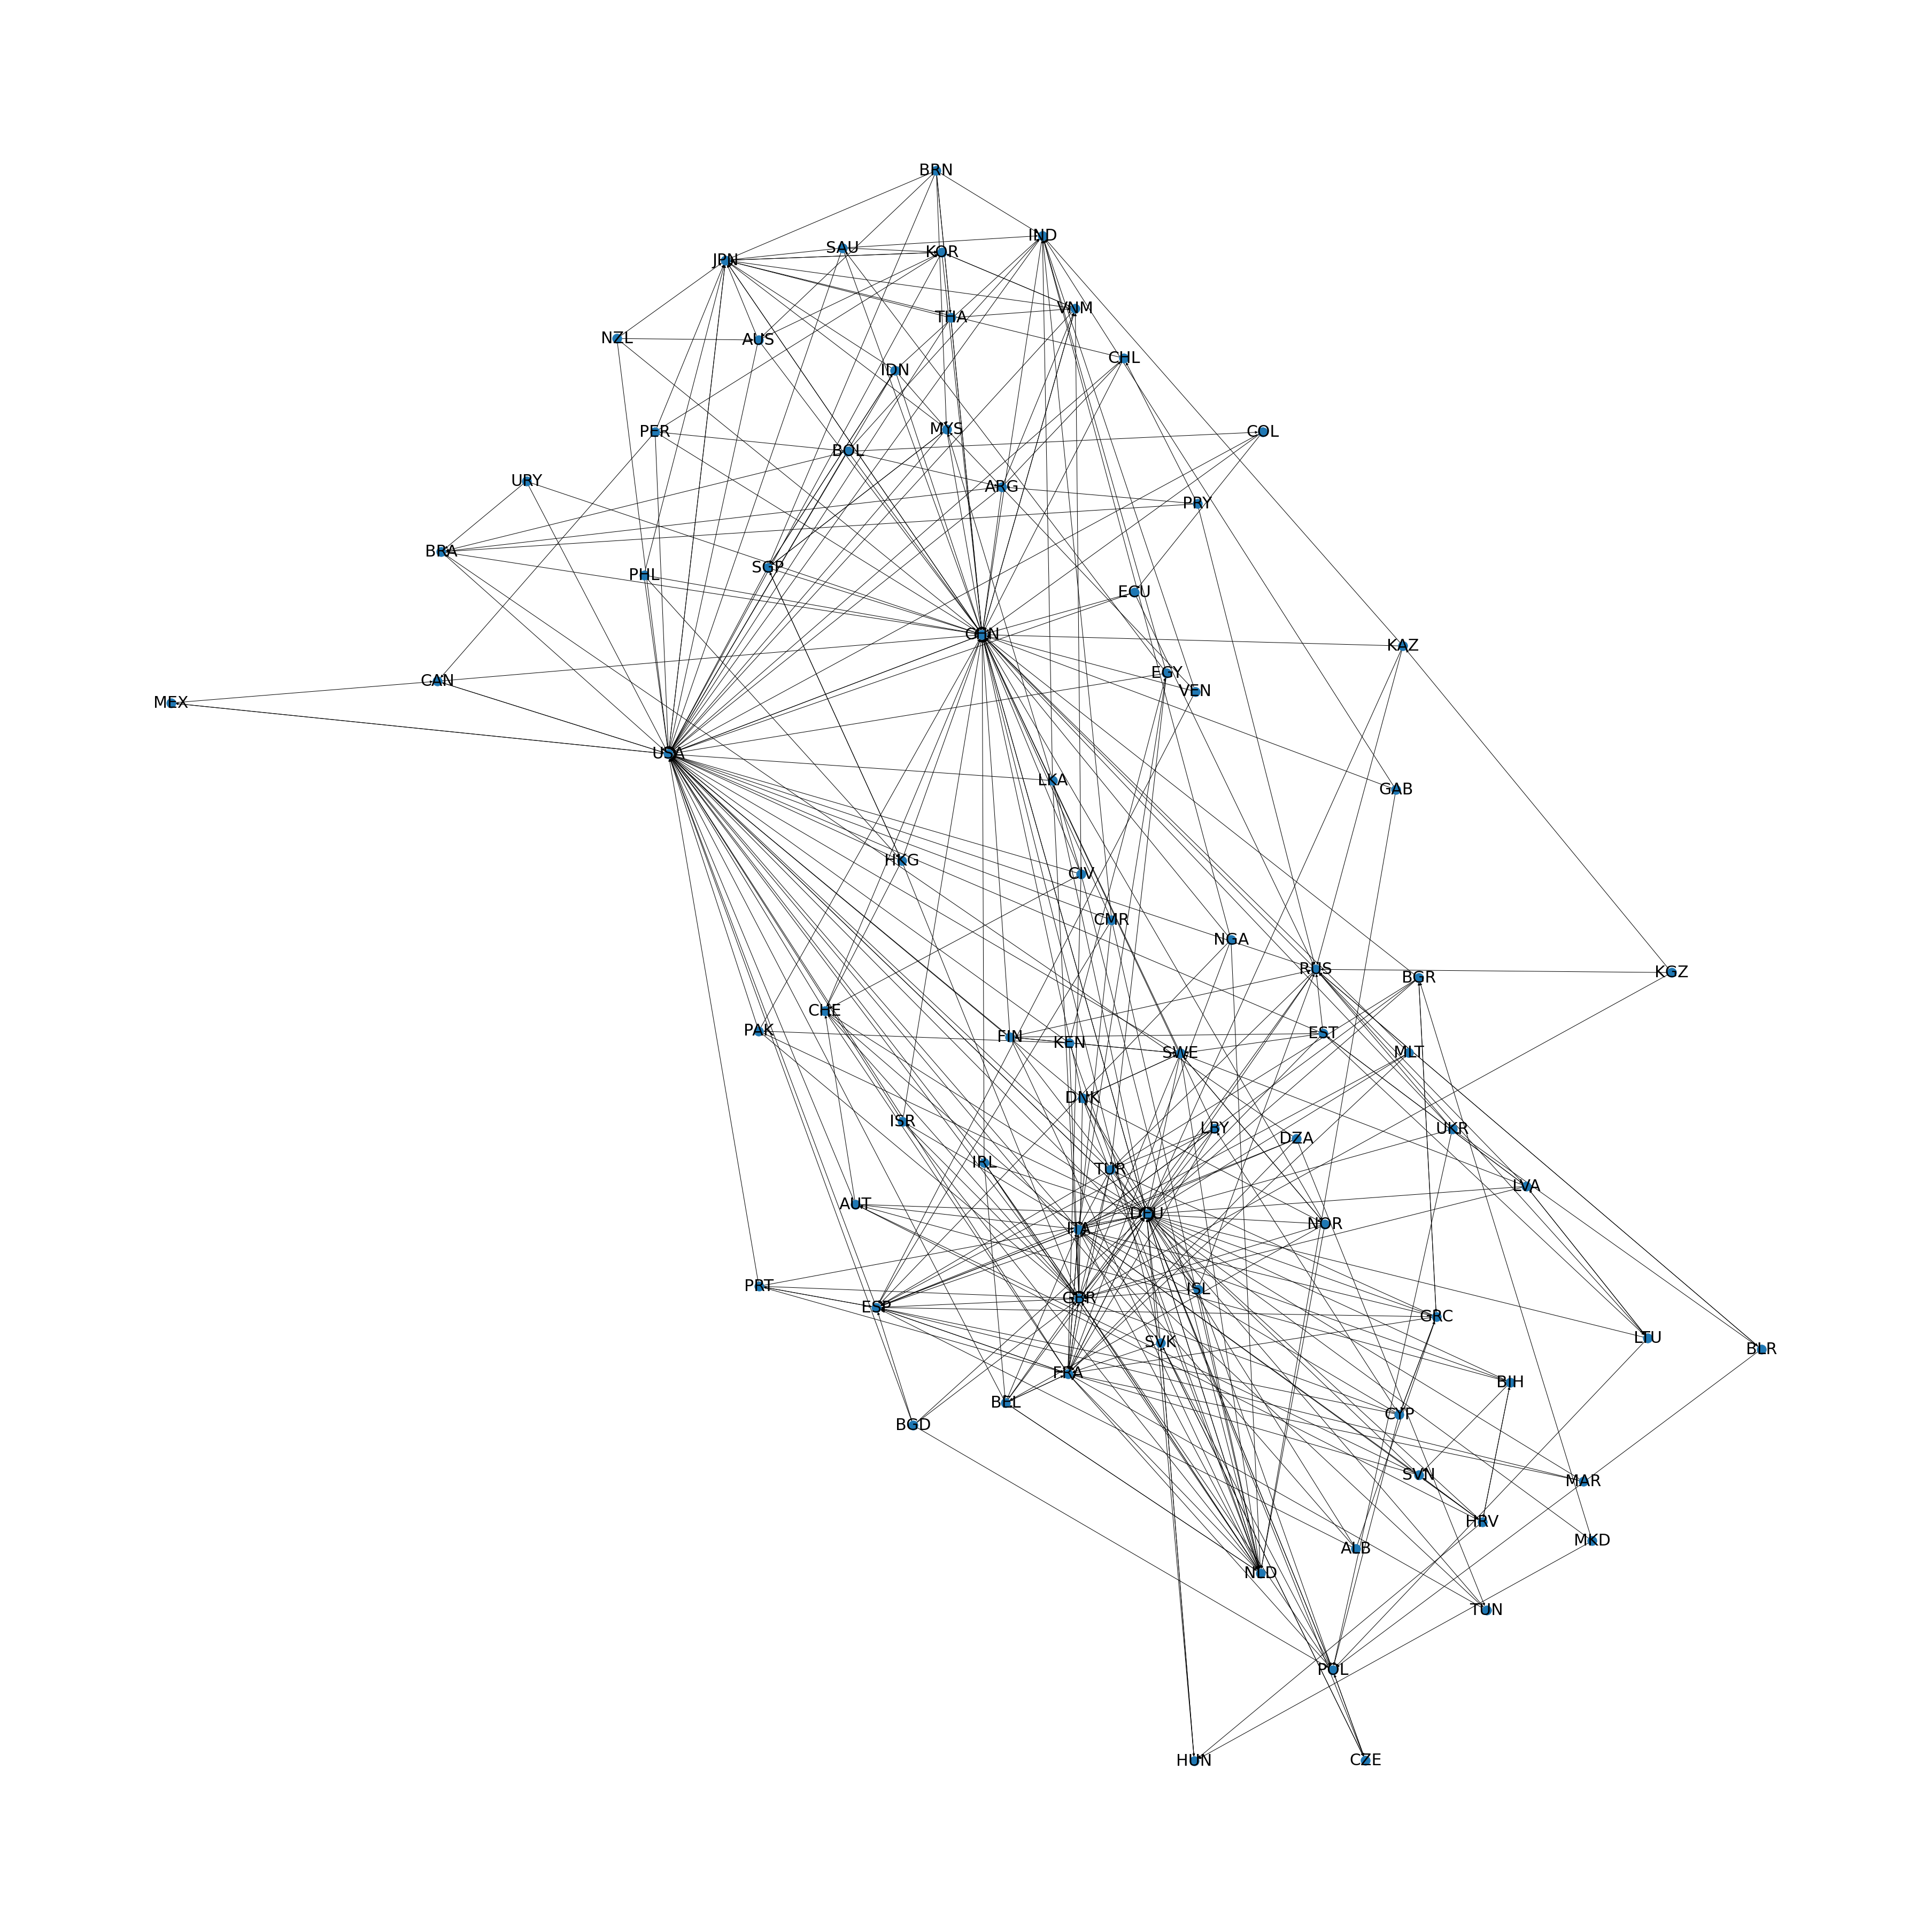

In [21]:
#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges

Graph_2020_2=nx.MultiDiGraph()
Graph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())
plt.figure(3, figsize=(70,50))

nx.draw(Graph_2020_2, with_labels=True, font_size=50)
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
'''
node size respectively to the total volume (of imports or exports or both??)
node color respectively to a positive or negative total volume
edgesize respectively to the volume
colored edge, if important trading (>1%)
'''

In [28]:
'''
define function that creates columns in our dataset

total_volume of exporter and importer. this will be the weight that introduces the node_size
net_trade_balance: if export_volume of exporter greater than import_volume of exporter, we have a netto export, 
which is good economically good. set node_color as green if positive and red if negative
set edge_color as blue if a certain trade is very important to the exporter (or importer?), i.e. if relative volume is larger 1%

#maybe move this step to the first notebook
'''
def introduce_total_volume_and_color(df):
    df_temp = df.copy()
    tot_vols = []
    tot_vols_imp = []
    for exp in df_temp.exporter.unique():
        total_volume = df_temp[df_temp["exporter"] == exp]["v2020"].sum()
        for index in df_temp[df_temp["exporter"] == exp]["v2020"]:
            tot_vols.append(total_volume)
    for imp in df_temp.importer.unique():
        total_volume_imp = df_temp[df_temp["importer"] == imp]["v2020"].sum()
        for index in df_temp[df_temp["importer"] ==imp]["v2020"]:
            tot_vols_imp.append(total_volume_imp)
    df_temp["total_volume_exporter"] = tot_vols
    df_temp["total_volume_importer"] = tot_vols_imp
    
    return df_temp

In [29]:
introduce_total_volume_and_color(data_relevant)

#doesn't seem to work yet. 
#I will try further probably during the weekend

exporter importer secgroup product         v2020 exporter_name  \
0        ALB      DEU      CAT      TT    158.091928       Albania   
1        ALB      ESP      CAT      TT    153.783585       Albania   
2        ALB      GRC      CAT      TT    136.735389       Albania   
3        ALB      ITA      CAT      TT    786.785264       Albania   
4        ARG      BRA      CAT      TT   8239.436776     Argentina   
..       ...      ...      ...     ...           ...           ...   
372      VEN      MYS      CAT      TT    419.944433     Venezuela   
373      VNM      CHN      CAT      TT  74888.702313      Viet Nam   
374      VNM      JPN      CAT      TT  20585.290628      Viet Nam   
375      VNM      KOR      CAT      TT  19698.097677      Viet Nam   
376      VNM      USA      CAT      TT  74124.562477      Viet Nam   

                              importer_name  relative_volume  \
0                                   Germany         0.081851   
1                                     Spain         0.079620   
2                                    Greece         0.070794   
3                                     Italy         0.407353   
4                                    Brazil         0.155157   
..                                      ...              ...   
372                                Malaysia         0.095323   
373                                   China         0.247177   
374                                   Japan         0.067944   
375                       Republic of Korea         0.065015   
376  USA- Puerto Rico and US Virgin Islands         0.244655   

     total_volume_exporter  total_volume_importer  
0              1235.396165          944667.679050  
1              1235.396165          944667.679050  
2              1235.396165          944667.679050  
3              1235.396165          944667.679050  
4             24298.725343          944667.679050  
..                     ...                    ...  
372            3405.197145           25024.669473  
373          189296.653095           25024.669473  
374          189296.653095           16878.441748  
375          189296.653095           10736.199495  
376          189296.653095          160147.027826  

[377 rows x 10 columns]